# ECON 425 Homework 9 - Submission by Pranov Suresh

## Question 2 - K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
p1 = [1.,1.,0.,5.,6.,4.]
p2 = [4.,3.,4.,1.,2.,0.]
X = pd.DataFrame(data = [p1, p2])
X = X.T
columns = ["X", "Y"]
X.columns = columns
X

,X,Y
0,1.0,4.0
1,1.0,3.0
2,0.0,4.0
3,5.0,1.0
4,6.0,2.0
5,4.0,0.0


## Q2 - A

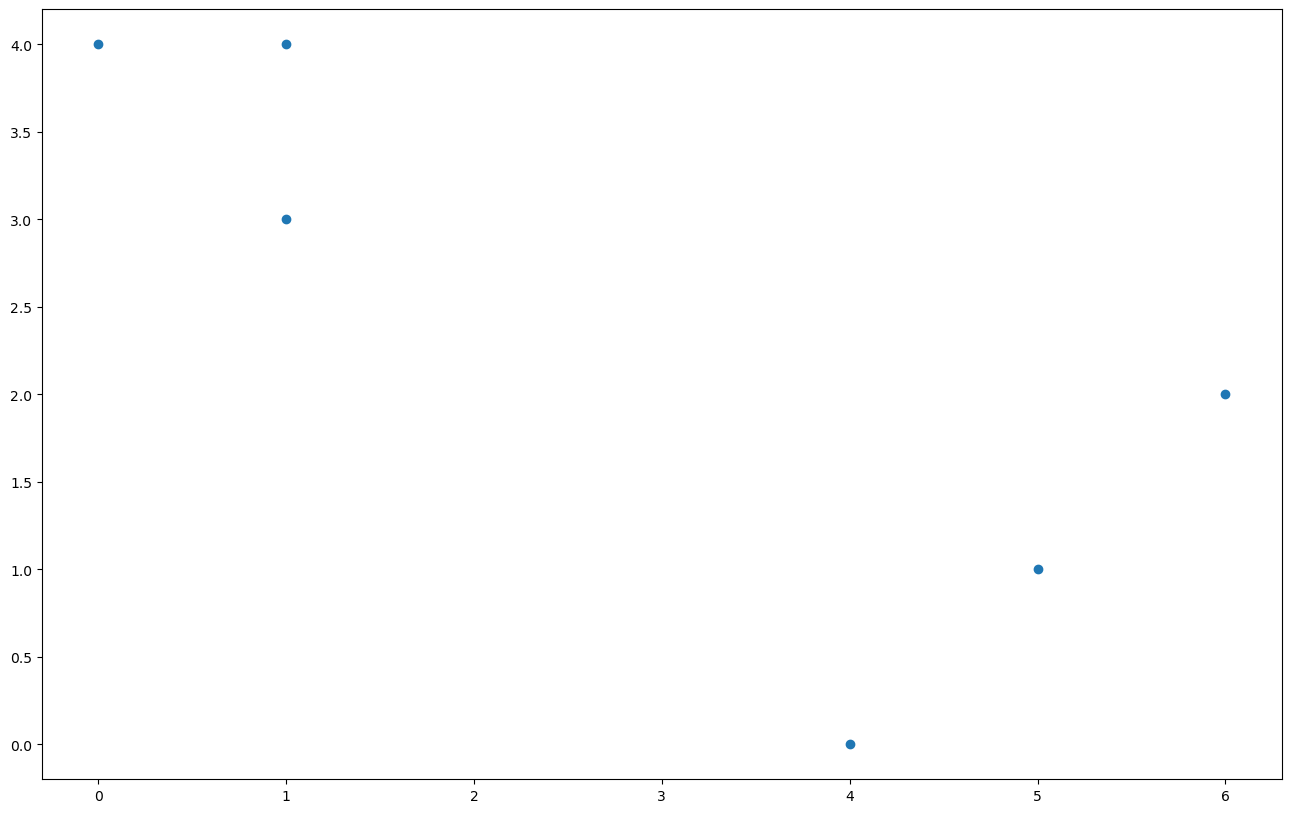

In [3]:
plt.figure(figsize=(16,10))
plt.scatter(X["X"], X["Y"])
plt.plot()
np.random.seed(seed = 14)

## Q2-B

In [4]:
cluster1 = np.random.choice(2)
cluster2 = np.random.choice(2)
cluster3 = np.random.choice(2)
cluster4 = np.random.choice(2)
cluster5 = np.random.choice(2)
cluster6 = np.random.choice(2)

print("The assigned clusters for each observation are:", "\nObservation 1:", cluster1, "\nObservation 2:", cluster2, "\nObservation 3:",cluster3, "\nObservation 4:", cluster4, "\nObservation 5:", cluster5, "\nObservation 6:", cluster6)

The assigned clusters for each observation are: 
Observation 1: 1 
Observation 2: 0 
Observation 3: 0 
Observation 4: 0 
Observation 5: 1 
Observation 6: 1


In [5]:
cluster1_X = X.iloc[1:4,:]
cluster1_X

,X,Y
1,1.0,3.0
2,0.0,4.0
3,5.0,1.0


In [6]:
cluster2_X = X.iloc[:1,:]
cluster2_X = cluster2_X._append(X.iloc[4:,:])
cluster2_X

,X,Y
0,1.0,4.0
4,6.0,2.0
5,4.0,0.0


## Q2 - C

In [7]:
centroid_1_1 = cluster1_X.mean()
centroid_2_1 = cluster2_X.mean()
print(centroid_1_1, centroid_2_1)

X    2.000000
Y    2.666667
dtype: float64 X    3.666667
Y    2.000000
dtype: float64


## Q2 - D

In [8]:
def distance(point1, point2, point3):
    X1 = point1["X"]
    Y1 = point1["Y"]
    X2 = point2.iloc[0]
    Y2 = point2.iloc[1]
    X3 = point3.iloc[0]
    Y3 = point3.iloc[1]
    distance1 = np.sqrt(((X2-X1)**2) + ((Y2-Y1)**2))
    distance2 = np.sqrt(((X3-X1)**2) + ((Y3-Y1)**2))
    if distance1 < distance2:
        text = ("Assigned to Cluster 1")
    else:
        text = ("Assigned to Cluster 2")
    return text

In [9]:
distance1_1 = distance(cluster1_X.iloc[0], centroid_1_1, centroid_2_1)
distance2_1 = distance(cluster1_X.iloc[1], centroid_1_1, centroid_2_1)
distance3_1 = distance(cluster1_X.iloc[2], centroid_1_1, centroid_2_1)
distance4_1 = distance(cluster2_X.iloc[0], centroid_1_1, centroid_2_1)
distance5_1 = distance(cluster2_X.iloc[1], centroid_1_1, centroid_2_1)
distance6_1= distance(cluster2_X.iloc[2], centroid_1_1, centroid_2_1)

print(distance1_1, distance2_1, distance3_1, distance4_1, distance5_1, distance6_1)

Assigned to Cluster 1 Assigned to Cluster 1 Assigned to Cluster 2 Assigned to Cluster 1 Assigned to Cluster 2 Assigned to Cluster 2


In [10]:
cluster3_X = cluster1_X.iloc[:2]
cluster3_X = cluster3_X._append(cluster2_X.iloc[0])
cluster3_X

,X,Y
1,1.0,3.0
2,0.0,4.0
0,1.0,4.0


In [11]:
cluster4_X = cluster2_X.iloc[1:]
cluster4_X = cluster4_X._append(cluster1_X.iloc[2])
cluster4_X

,X,Y
4,6.0,2.0
5,4.0,0.0
3,5.0,1.0


## Q2 - E

In [12]:
centroid_1_2 = cluster3_X.mean()
centroid_2_2 = cluster4_X.mean()
print(centroid_1_2)
print(centroid_2_2)

X    0.666667
Y    3.666667
dtype: float64
X    5.0
Y    1.0
dtype: float64


In [13]:
distance1_2 = distance(cluster3_X.iloc[0], centroid_1_2, centroid_2_2)
distance2_2 = distance(cluster3_X.iloc[1], centroid_1_2, centroid_2_2)
distance3_2 = distance(cluster3_X.iloc[2], centroid_1_2, centroid_2_2)
distance4_2 = distance(cluster4_X.iloc[0], centroid_1_2, centroid_2_2)
distance5_2 = distance(cluster4_X.iloc[1], centroid_1_2, centroid_2_2)
distance6_2= distance(cluster4_X.iloc[2], centroid_1_2, centroid_2_2)

print(distance1_2, distance2_2, distance3_2, distance4_2, distance5_2, distance6_2)

Assigned to Cluster 1 Assigned to Cluster 1 Assigned to Cluster 1 Assigned to Cluster 2 Assigned to Cluster 2 Assigned to Cluster 2


# There are no changes in allocation of clusters as euclidean distance to the centroid has already been minimised with two rounds of 2-means clustering. 

## By allocating each observation to the optimal cluster with the lowest ddistance to the closest centroid, the K-means clustering has been completed.

## Q2 - F

[]

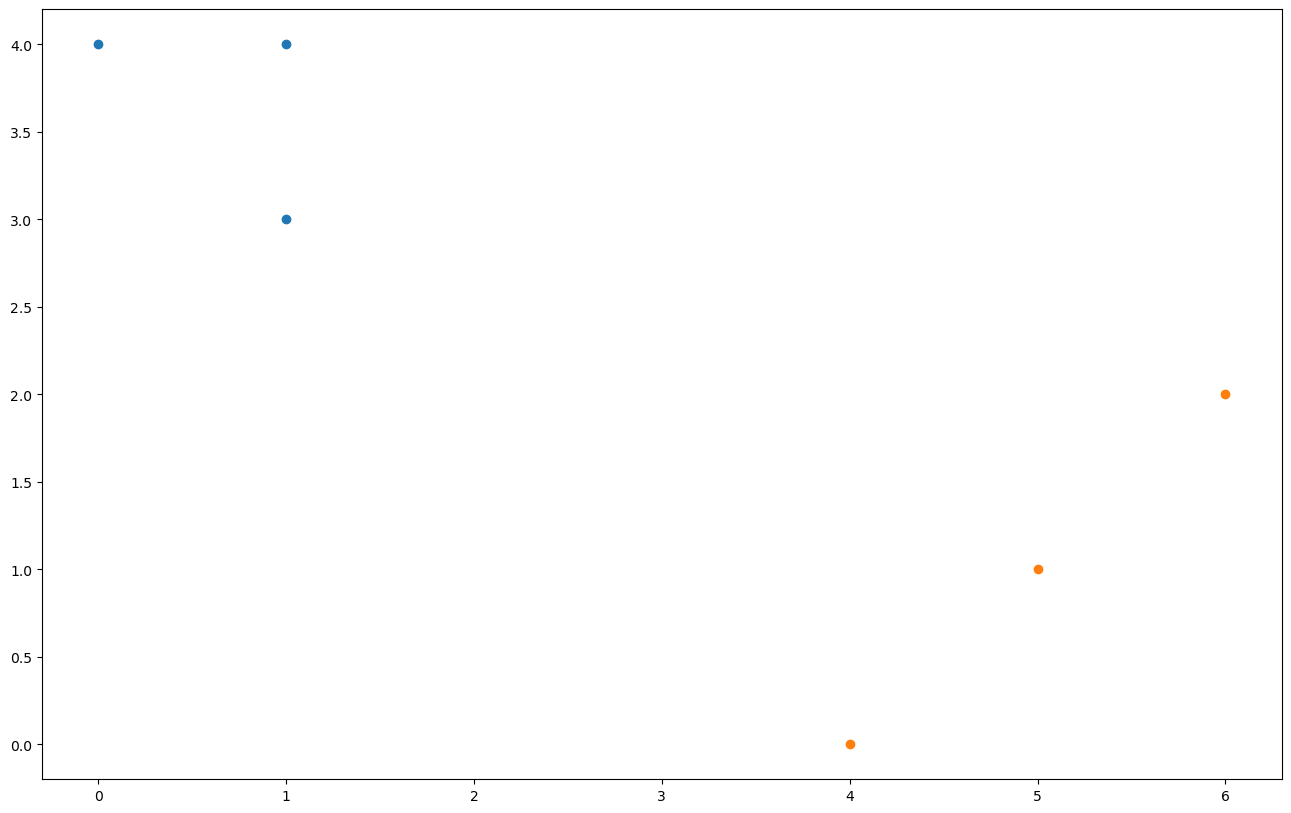

In [14]:
plt.figure(figsize=(16,10))
plt.scatter(cluster3_X["X"], cluster3_X["Y"])
plt.scatter(cluster4_X["X"], cluster4_X["Y"])
plt.plot()

## Question 3

In [15]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

## Q3 - A

In [16]:
faces = fetch_olivetti_faces()
faces_images = faces.images
n_faces, height, width = faces_images.shape

## Q3 - B

In [17]:
X = faces_images.reshape((n_faces, height * width))
mean_face = np.mean(X, axis=0)
X_demeaned = X - mean_face

## Q3 - C

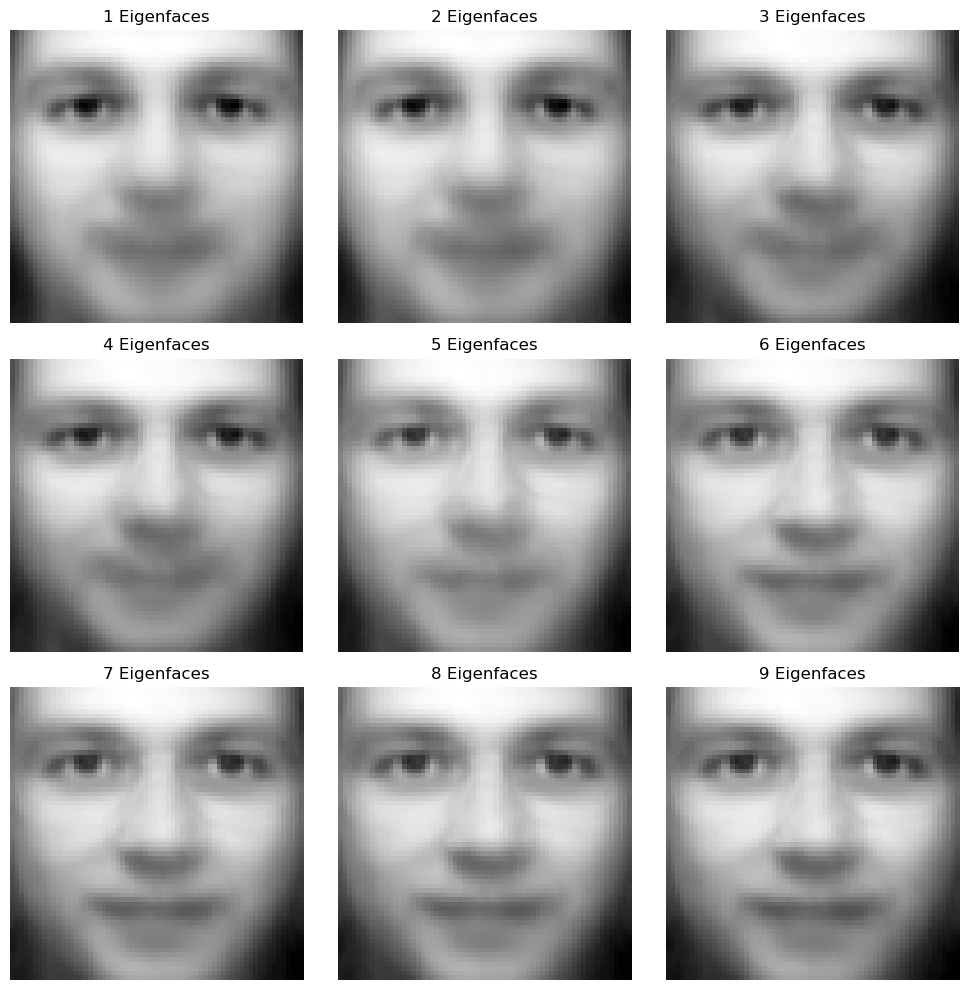

In [18]:
n_components = 9
pca = PCA(n_components=n_components)
pca.fit(X_demeaned)
selected_face_index = 28
selected_face = X[selected_face_index]

reconstructed_faces = []
num_eigenfaces_to_combine = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for num_eigenfaces in num_eigenfaces_to_combine:
    eigen_vectors = pca.components_[:num_eigenfaces]
    weights = np.dot(selected_face - mean_face, eigen_vectors.T)
    reconstructed_face = mean_face + np.dot(weights, eigen_vectors)
    reconstructed_faces.append(reconstructed_face)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < len(num_eigenfaces_to_combine):
        ax.imshow(reconstructed_faces[i].reshape((height, width)), cmap='gray')
        ax.set_title(f'{num_eigenfaces_to_combine[i]} Eigenfaces')
    else:
        ax.imshow(pca.components_[i - len(num_eigenfaces_to_combine)].reshape((height, width)), cmap='gray')
        ax.set_title(f'Eigenface {i - len(num_eigenfaces_to_combine) + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Q3 - D

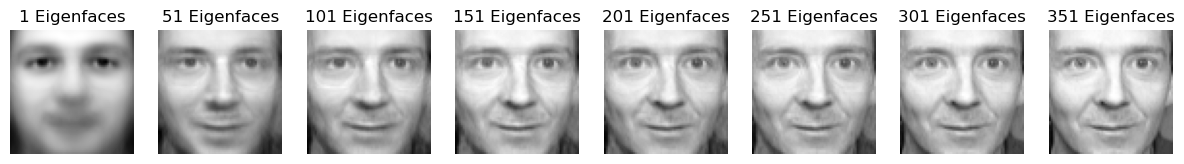

In [19]:
n_components = 400
pca = PCA(n_components=n_components)
pca.fit(X_demeaned)

selected_face_index = 28
selected_face = X[selected_face_index]

eigen_vectors = pca.components_

reconstructed_faces = []
for i in range(1, n_components + 1, 50):
    eigen_subset = eigen_vectors[:i]
    weights = np.dot(selected_face - mean_face, eigen_subset.T)
    reconstructed_face = mean_face + np.dot(weights, eigen_subset)
    reconstructed_faces.append(reconstructed_face)

fig, axes = plt.subplots(1, len(reconstructed_faces), figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(reconstructed_faces[i].reshape((height, width)), cmap='gray')
    ax.set_title(f'{i * 50 + 1} Eigenfaces')
    ax.axis('off')
plt.show()